In [101]:
import pandas as pd
import numpy as np

In [102]:
a=pd.read_csv('data/data.csv')
a.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Data cleaning

In [104]:
a.isna().sum()


acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
dtype: int64

In [105]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   instrumentalness  169909 non-null  float64
 7   key               169909 non-null  int64  
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  mode              169909 non-null  int64  
 11  name              169909 non-null  object 
 12  popularity        169909 non-null  int64  
 13  release_date      169909 non-null  object 
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  float64
 16  valence           16

In [106]:
a.shape

(169909, 17)

In [107]:
numeric_features = [feature for feature in a.columns if a[feature].dtype != 'O']
categorical_features = [feature for feature in a.columns if a[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence']

We have 3 categorical features : ['artists', 'name', 'release_date']


In [108]:
numerical_table=a.drop(categorical_features,axis=1)

In [109]:
numerical_table

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720


In [110]:
a.nunique()


acousticness          4714
artists              33375
danceability          1232
duration_ms          50212
energy                2332
explicit                 2
instrumentalness      5401
key                     12
liveness              1741
loudness             25313
mode                     2
name                132940
popularity             100
release_date         10882
speechiness           1628
tempo                84548
valence               1739
dtype: int64

Data visualisation

<AxesSubplot:>

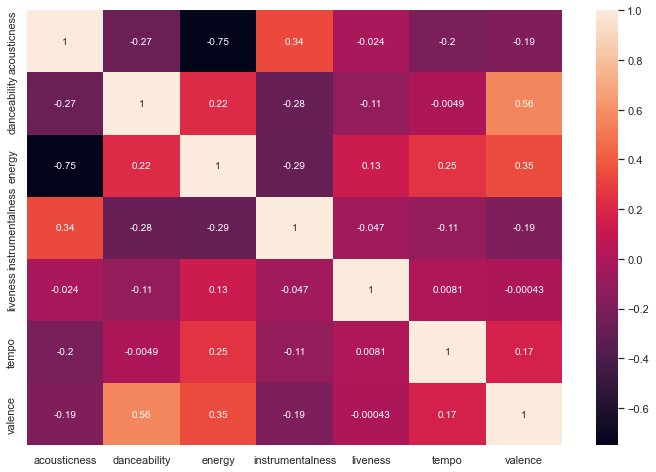

In [111]:
corr = a[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

It seems that energy and acoustiness are negatively correlated 

According to the valence arousal plane theory  the higher the valence with the energy the more people are happy. As well as it is found that the more is the tempo in the song the more people are happy

<AxesSubplot:xlabel='valence', ylabel='energy'>

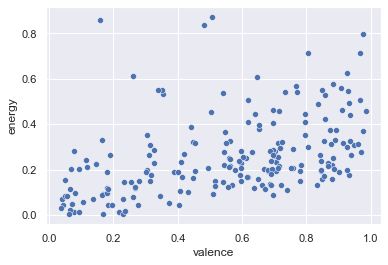

In [112]:
sns.scatterplot(x='valence',y='energy',data=a.head(200))

<AxesSubplot:xlabel='tempo', ylabel='energy'>

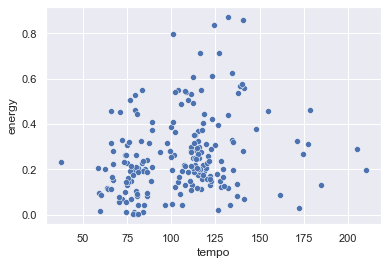

In [113]:
sns.scatterplot(x='tempo',y='energy',data=a.head(200))

<AxesSubplot:xlabel='valence', ylabel='Count'>

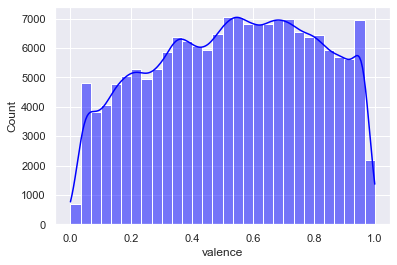

In [114]:
sns.histplot(data=a,x='valence',bins=30,kde=True,color='blue')

<AxesSubplot:xlabel='energy', ylabel='Count'>

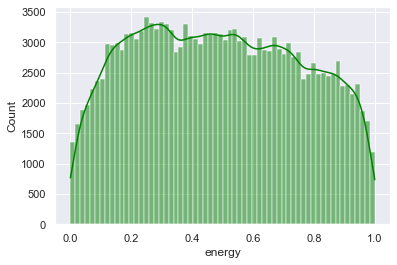

In [115]:
sns.histplot(x='energy',data=a,kde=True,color='green')

<AxesSubplot:xlabel='tempo', ylabel='Count'>

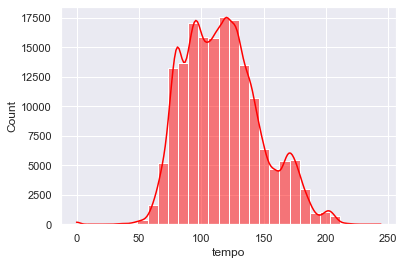

In [116]:
sns.histplot(x='tempo',bins=30,kde=True,data=a,color='red')

According to the data we can see the data is pretty balanced so no need for transformation but it is such still it is a good practice to normalize the data

Data Transformation

<AxesSubplot:xlabel='emotional_state', ylabel='energy'>

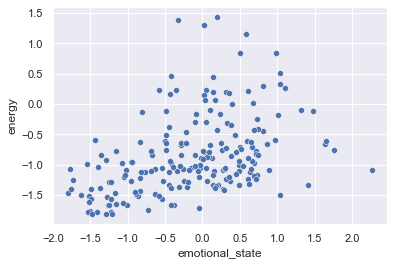

In [117]:
import numpy as np
def normalize(x):
    y = (x - np.mean(x))
    y/=np.std(x)
    return y
numerical_table['valence']=normalize(numerical_table['valence'])
numerical_table['energy']=normalize(numerical_table['energy'])
numerical_table['tempo']=normalize(numerical_table['tempo'])
numerical_table['emotional_state']=(numerical_table['tempo']+numerical_table['valence'])/2
sns.scatterplot(x='emotional_state',y='energy',data=numerical_table.head(200))

If we divide the data into four axis we know the emotional_state after 0 is related to excitement, happiness, and contenment while the data after 0 will be considered sad,nervous,bored and tired out so we'll encode it accordingly this is according to valence energy theory

In [118]:
i=0
emotions=[]
for val in numerical_table['emotional_state']:
    if val>0:
        emotions.append(1)
    else:
        emotions.append(0)
emotions
numerical_table['emotions']=emotions
numerical_table

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,emotional_state,emotions
0,0.9950,0.708,158648,-1.097999,0,0.563000,10,0.1510,-12.428,1,0,0.0506,0.049500,0.940924,0.495212,1
1,0.9940,0.379,282133,-1.776785,0,0.901000,8,0.0763,-28.454,1,0,0.0462,-1.073199,-1.735454,-1.404327,0
2,0.6040,0.749,104300,-1.004503,0,0.000000,5,0.1190,-19.924,0,0,0.9290,-0.317996,1.325822,0.503913,1
3,0.9950,0.781,180760,-1.341091,0,0.887000,1,0.1110,-14.734,0,0,0.0926,-0.291114,0.716082,0.212484,1
4,0.9900,0.210,687733,-1.064341,0,0.908000,11,0.0980,-16.829,1,1,0.0424,-1.783425,-1.763655,-1.773540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,-0.170512,1,0.000032,1,0.0891,-7.461,1,75,0.1430,-0.551180,-0.861621,-0.706400,0
169905,0.0167,0.719,167468,-0.387425,0,0.031300,8,0.1110,-10.907,1,64,0.0403,0.359685,-0.998812,-0.319564,0
169906,0.5380,0.514,180700,0.188515,0,0.002330,7,0.1080,-9.332,1,70,0.1050,0.219742,-1.444685,-0.612471,0
169907,0.0714,0.646,167308,1.018766,0,0.000000,1,0.2220,-2.557,1,70,0.0385,0.422041,-0.229015,0.096513,1


<AxesSubplot:xlabel='emotional_state', ylabel='emotions'>

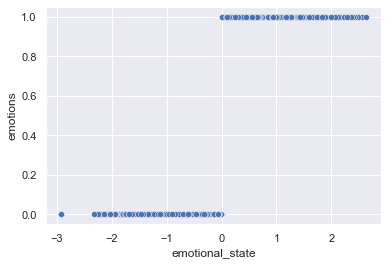

In [119]:
sns.scatterplot(x='emotional_state',y='emotions',data=numerical_table)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
X_train, X_test, y_train, y_test=train_test_split(numerical_table[['valence']],numerical_table.emotions,test_size=0.2,random_state=49)



In [121]:
lr.fit(X_train,y_train)

LogisticRegression()

In [122]:
lr.score(X_test,y_test)

0.7919781060561474

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
r=RandomForestClassifier(n_estimators=30)
r.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [124]:
r.score(X_test,y_test)

0.791124713083397

In [282]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="12496220faa84eb39d6fdd22d53f3599",
                                                           client_secret="bc1f341b8551410c98f12d749c49fd33"))


Using the playlist of top 50 worldwide song from spotify

In [126]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [127]:
l=[]
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    l.append(sp.audio_features(track_uri))


In [287]:
b = pd.DataFrame(columns=list(l[0][0].keys()))

# Iterate over each dictionary in the list and append it to a
for d in l:
    b = b.append(d, ignore_index=True)

# Print the concatenated DataFrame
print(b)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353

   danceability energy key loudness mode speechiness acousticness  \
0         0.707  0.681   0   -4.325    1      0.0668       0.0632   
1         0.668  0.758   5   -5.176    0      0.0332        0.483   
2         0.644  0.735   8   -5.747    1      0.0391       0.0521   
3          0.72   0.63   4   -3.547    0       0.277        0.673   
4         0.812  0.479   2   -5.678    0       0.333        0.213   
5         0.768  0.644   5   -6.671    0       0.136        0.736   
6         0.817   0.44  10   -8.482    0      0.0734       0.0603   
7         0.783  0.592  11   -8.332    0      0.0331        0.435   
8          0.52  0.731   6   -5.338    0      0.0557        0.342   
9         0.696  0.809   5   -8.254    1        0.05        0.252   
10        0.575    0.5   1   -7.594    0      0.0707        0.227   
11        0.715   0.62   1   -6.005    0      0.0484        0.417   
12        0.841  0.384   9   -7.684    0      0.0351       0.0236   
13        0.801  0.806  11   -5.20

C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353493.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b = b.append(d, ignore_index=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_29224\2520353

Normalizing the data recieved into the dataframe

In [288]:
b['valence']=normalize(b['valence'])
b['energy']=normalize(b['energy'])
b['tempo']=normalize(b['tempo'])
b['emotional_state']=(b['tempo']+b['valence'])/2

In [289]:
b

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,emotional_state
0,0.707,0.266608,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.463928,-0.220976,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,0.121476
1,0.668,0.895553,5,-5.176,0,0.0332,0.483,0.000019,0.0837,1.301118,0.812086,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,1.056602
2,0.644,0.707687,8,-5.747,1,0.0391,0.0521,0.144,0.161,-0.551388,-1.22059,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,-0.885989
3,0.72,-0.149967,4,-3.547,0,0.277,0.673,0,0.0936,0.290256,1.91387,audio_features,0DWdj2oZMBFSzRsi2Cvfzf,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,https://api.spotify.com/v1/tracks/0DWdj2oZMBFS...,https://api.spotify.com/v1/audio-analysis/0DWd...,199440,4,1.102063
4,0.812,-1.383354,2,-5.678,0,0.333,0.213,0.000001,0.0756,0.076505,1.567609,audio_features,2UW7JaomAMuX9pZrjVpHAU,spotify:track:2UW7JaomAMuX9pZrjVpHAU,https://api.spotify.com/v1/tracks/2UW7JaomAMuX...,https://api.spotify.com/v1/audio-analysis/2UW7...,234353,4,0.822057
5,0.768,-0.035613,5,-6.671,0,0.136,0.736,0.000837,0.173,-0.052636,-1.011498,audio_features,609E1JCInJncactoMmkDon,spotify:track:609E1JCInJncactoMmkDon,https://api.spotify.com/v1/tracks/609E1JCInJnc...,https://api.spotify.com/v1/audio-analysis/609E...,194543,4,-0.532067
6,0.817,-1.701911,10,-8.482,0,0.0734,0.0603,0.000001,0.33,0.009708,0.60661,audio_features,7aRCf5cLOFN1U7kvtChY1G,spotify:track:7aRCf5cLOFN1U7kvtChY1G,https://api.spotify.com/v1/tracks/7aRCf5cLOFN1...,https://api.spotify.com/v1/audio-analysis/7aRC...,272113,4,0.308159
7,0.783,-0.460356,11,-8.332,0,0.0331,0.435,0.000004,0.347,0.820179,-0.151428,audio_features,7FbrGaHYVDmfr7KoLIZnQ7,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,0.334376
8,0.52,0.675014,6,-5.338,0,0.0557,0.342,0.00101,0.311,0.535178,1.705673,audio_features,4Dvkj6JhhA12EX05fT7y2e,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4,1.120425
9,0.696,1.312128,5,-8.254,1,0.05,0.252,0.000128,0.248,1.40354,0.294453,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4,0.848996


In [290]:
b['emotion']=lr.predict(b[['emotional_state']])

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- emotional_state
Feature names seen at fit time, yet now missing:
- valence

  warnings.warn(message, FutureWarning)


In [291]:
b

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,emotional_state,emotion
0,0.707,0.266608,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.463928,-0.220976,audio_features,4DHcnVTT87F0zZhRPYmZ3B,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,https://api.spotify.com/v1/tracks/4DHcnVTT87F0...,https://api.spotify.com/v1/audio-analysis/4DHc...,200455,4,0.121476,1
1,0.668,0.895553,5,-5.176,0,0.0332,0.483,0.000019,0.0837,1.301118,0.812086,audio_features,3dnP0JxCgygwQH9Gm7q7nb,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,1.056602,1
2,0.644,0.707687,8,-5.747,1,0.0391,0.0521,0.144,0.161,-0.551388,-1.22059,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,-0.885989,0
3,0.72,-0.149967,4,-3.547,0,0.277,0.673,0,0.0936,0.290256,1.91387,audio_features,0DWdj2oZMBFSzRsi2Cvfzf,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,https://api.spotify.com/v1/tracks/0DWdj2oZMBFS...,https://api.spotify.com/v1/audio-analysis/0DWd...,199440,4,1.102063,1
4,0.812,-1.383354,2,-5.678,0,0.333,0.213,0.000001,0.0756,0.076505,1.567609,audio_features,2UW7JaomAMuX9pZrjVpHAU,spotify:track:2UW7JaomAMuX9pZrjVpHAU,https://api.spotify.com/v1/tracks/2UW7JaomAMuX...,https://api.spotify.com/v1/audio-analysis/2UW7...,234353,4,0.822057,1
5,0.768,-0.035613,5,-6.671,0,0.136,0.736,0.000837,0.173,-0.052636,-1.011498,audio_features,609E1JCInJncactoMmkDon,spotify:track:609E1JCInJncactoMmkDon,https://api.spotify.com/v1/tracks/609E1JCInJnc...,https://api.spotify.com/v1/audio-analysis/609E...,194543,4,-0.532067,0
6,0.817,-1.701911,10,-8.482,0,0.0734,0.0603,0.000001,0.33,0.009708,0.60661,audio_features,7aRCf5cLOFN1U7kvtChY1G,spotify:track:7aRCf5cLOFN1U7kvtChY1G,https://api.spotify.com/v1/tracks/7aRCf5cLOFN1...,https://api.spotify.com/v1/audio-analysis/7aRC...,272113,4,0.308159,1
7,0.783,-0.460356,11,-8.332,0,0.0331,0.435,0.000004,0.347,0.820179,-0.151428,audio_features,7FbrGaHYVDmfr7KoLIZnQ7,spotify:track:7FbrGaHYVDmfr7KoLIZnQ7,https://api.spotify.com/v1/tracks/7FbrGaHYVDmf...,https://api.spotify.com/v1/audio-analysis/7Fbr...,174253,4,0.334376,1
8,0.52,0.675014,6,-5.338,0,0.0557,0.342,0.00101,0.311,0.535178,1.705673,audio_features,4Dvkj6JhhA12EX05fT7y2e,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4,1.120425,1
9,0.696,1.312128,5,-8.254,1,0.05,0.252,0.000128,0.248,1.40354,0.294453,audio_features,6AQbmUe0Qwf5PZnt4HmTXv,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5...,https://api.spotify.com/v1/audio-analysis/6AQb...,131013,4,0.848996,1


We use extract1 and extract 2 to randomly take a single subset sample of data so each time it recommends a different song based on your mood

In [311]:
extract1=b[b['emotion']==1]
extract2=b[b['emotion']==0]
random_row1 = extract1.sample(n=1)
random_row2 = extract2.sample(n=1)

In [312]:
def string(r):
    k=str(r['id'])

    tokens = k.split()

    # extract the second token
    id_string = tokens[1]

    # print the extracted string
    return id_string

In [313]:
track1 = sp.track(string(random_row1))
print("The recommended track name:",track1['name'],"and the artist name:",track1['artists'][0]['name'])

The recommended track name: TQG and the artist name: KAROL G


In [314]:
track2 = sp.track(string(random_row2))
print("The recommended track name:",track2['name'],"and the artist name:",track2['artists'][0]['name'])

The recommended track name: Unholy (feat. Kim Petras) and the artist name: Sam Smith


Here we can see our music recommendation system is working now the work is left of making it into different layers and making a web app out of it